# Bank Customer Churn

In this project i identified the factor that are responsible to customer churn. And to predict whether a customer will churn or not based on different values of factors.   
  
    
Taking a dataset of customer which contains relevent information -

In [2]:
#importing necessary modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df=pd.read_csv("D:/files/Bank_Customer_Churn.csv")

In [4]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.shape

(10000, 12)

In the data column customer_id is nominal data which does not give any impact to churn so it should be dropped-

In [6]:
df=df.drop(['customer_id'],axis=1)
df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
print(list(df))

['credit_score', 'country', 'gender', 'age', 'tenure', 'balance', 'products_number', 'credit_card', 'active_member', 'estimated_salary', 'churn']


In [8]:
#data type of variables
df.dtypes

credit_score          int64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

### The overall picture of customer that stayed and those who exited

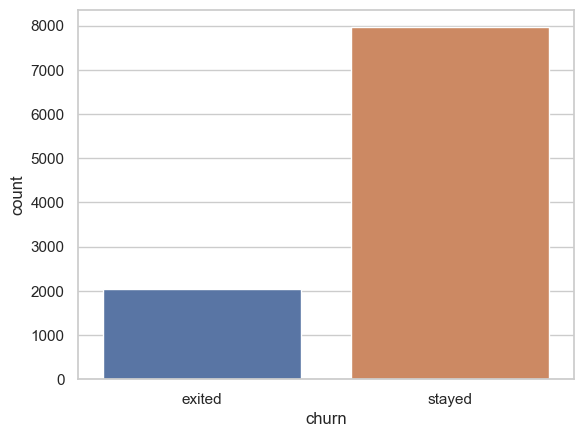

In [9]:
#bar chart
sns.set_theme(style="whitegrid")
sns.countplot(x='churn',data=df.replace({"churn" : {1 : "exited", 0 : "stayed"}}))
plt.show()


In [10]:
#assigning keys for pie chart
size=df['churn'].value_counts()
size
keys=['stayed','exited']

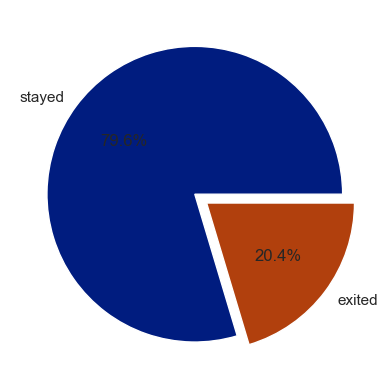

In [11]:
#pie chart
explode=[0,0.1]
palette_color = sns.color_palette('dark')
plt.pie(size, labels=keys, colors=palette_color,explode=explode, autopct='%1.1f%%')
plt.show()

#### Visualizing effects of different variables on staying and exiting

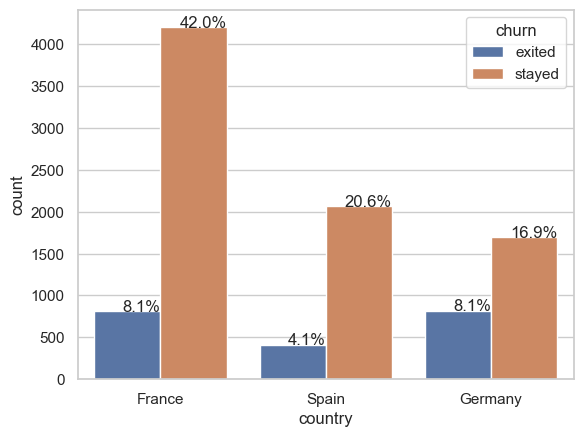

In [12]:
#country wise
s=sns.countplot(x='country',hue='churn',data=df.replace({"churn" : {1 : "exited", 0 : "stayed"}}))
s
total = float(len(df))
for p in s.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    s.annotate(percentage, (x, y),ha="right")

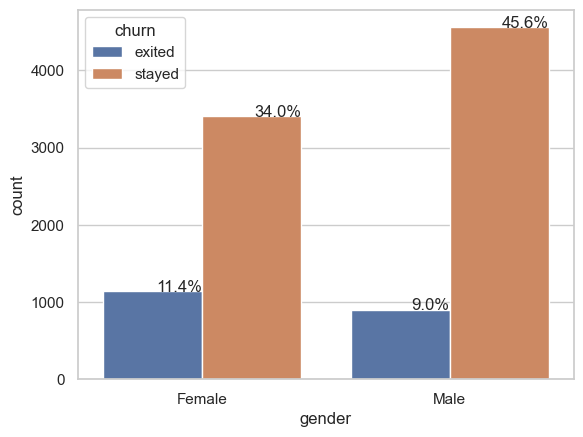

In [13]:
#gender wise
t=sns.countplot(x='gender',hue='churn',data=df.replace({"churn" : {1 : "exited", 0 : "stayed"}}))
t
for p in t.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    t.annotate(percentage, (x, y),ha="right")

Target variable has binary values here, for modeling and prediction Logistic Regression can be used. 

In [14]:
#In Regression analysis values should be numerical
# labeling nominal data  which is categorical into numeric values
# for gender 1 - female, 0 - male
# for country 0- France, 1- Spain, 2- Germany
df=df.replace({"gender" : {"Female":1,"Male":0 },"country" : {"France":0,"Spain":1,"Germany":2 }})

In [15]:
df.head(10)

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,608,1,1,41,1,83807.86,1,0,1,112542.58,0
2,502,0,1,42,8,159660.80,3,1,0,113931.57,1
3,699,0,1,39,1,0.00,2,0,0,93826.63,0
4,850,1,1,43,2,125510.82,1,1,1,79084.10,0
5,645,1,0,44,8,113755.78,2,1,0,149756.71,1
6,822,0,0,50,7,0.00,2,1,1,10062.80,0
7,376,2,1,29,4,115046.74,4,1,0,119346.88,1
8,501,0,0,44,4,142051.07,2,0,1,74940.50,0
9,684,0,0,27,2,134603.88,1,1,1,71725.73,0


In [16]:
#correlation berween variables
cor=df.corr()
cor

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
credit_score,1.000000,0.008267,0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
country,0.008267,1.000000,0.016936,0.048092,0.001418,0.348700,-0.006180,0.004036,-0.012692,0.007382,0.153771
gender,0.002857,0.016936,1.000000,0.027544,-0.014733,-0.012087,0.021859,-0.005766,-0.022544,0.008112,0.106512
age,-0.003965,0.048092,0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
tenure,0.000842,0.001418,-0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
balance,0.006268,0.348700,-0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
products_number,0.012238,-0.006180,0.021859,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
credit_card,-0.005458,0.004036,-0.005766,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
active_member,0.025651,-0.012692,-0.022544,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
estimated_salary,-0.001384,0.007382,0.008112,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


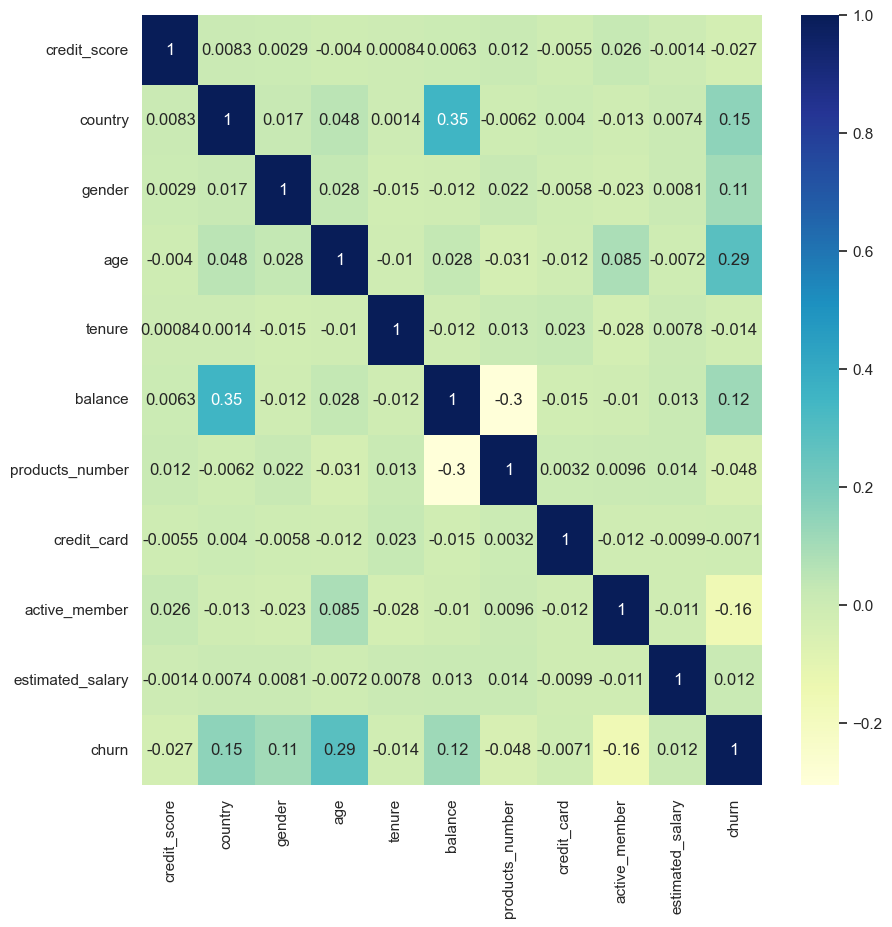

In [17]:
plt.subplots(figsize=(10,10))
sns.heatmap(cor,cmap="YlGnBu",annot=True)
plt.show()

from the above correlation table and heatmap of correlation table can be used to understand the multicollinearity in the data.

In [18]:
#Independet variable dataset
X=df.iloc[:,:10]
X.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
0,619,0,1,42,2,0.00,1,1,1,101348.88
1,608,1,1,41,1,83807.86,1,0,1,112542.58
2,502,0,1,42,8,159660.80,3,1,0,113931.57
3,699,0,1,39,1,0.00,2,0,0,93826.63
4,850,1,1,43,2,125510.82,1,1,1,79084.10


In [19]:
#splitting data set into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,df.churn,train_size=0.8)

In [20]:
X_train.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
5289,613,1,0,19,5,0.00,1,1,1,176903.35
7652,704,0,0,24,2,148197.15,2,1,0,182775.08
8487,706,2,0,34,0,140641.26,2,1,1,77271.91
8080,757,0,0,47,3,130747.10,1,1,0,143829.54
4955,775,2,0,33,3,83501.66,2,1,0,128841.31


In [21]:
y_train.head()

5289    0
7652    0
8487    0
8080    0
4955    0
Name: churn, dtype: int64

In [22]:
#logistic regression module
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [23]:
#fittig model
model.fit(X_train, y_train)

LogisticRegression()

In [44]:
model.coef_

array([[-4.97344140e-03,  1.58199159e-03,  9.19789933e-04,
         4.34592760e-02, -1.48648461e-03,  3.66502779e-06,
        -3.61424618e-04, -2.03066063e-04, -1.36766227e-03,
        -1.68259545e-06]])

In [42]:
c=model.coef_[0]

In [45]:
#coefficent of the model
coeff = pd.Series(c, index = X.columns)
intercept = model.intercept_
print("Coefficients are :")
print(coeff)
print("\n\n")
print("intercept of the model :")
print(model.intercept_)

Coefficients are :
credit_score       -0.004973
country             0.001582
gender              0.000920
age                 0.043459
tenure             -0.001486
balance             0.000004
products_number    -0.000361
credit_card        -0.000203
active_member      -0.001368
estimated_salary   -0.000002
dtype: float64



intercept of the model :
[-0.00019051]


In [57]:
#predicted target value of test set

with np.printoptions(threshold=np.inf):
    print(model.predict(X_test))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [58]:
#accuracy of the model
from sklearn.metrics import classification_report

In [59]:
#classification report
print(classification_report(y_test,model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.79      0.98      0.88      1579
           1       0.41      0.04      0.07       421

    accuracy                           0.79      2000
   macro avg       0.60      0.51      0.48      2000
weighted avg       0.71      0.79      0.71      2000



precision and recall of being exited from bank ('1') is low that mean we have case of high number of false positives and high number of false negatives for '1'. The accuracy of the model is 79 % which may not be consider as good.  
So Logistic regression model may not be suitable for this data and this specific problem.

### Logistic Regression can also be performed using Statsmodels module, it gives the whole summary of fitted model with relevent statistics.

In [60]:
xy_train=X_train

In [61]:
xy_train['y']=y_train.tolist()


In [62]:
xy_train.head(10)

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,y
5716,611,2,0,37,1,117524.72,2,0,1,161064.29,0
6339,644,0,1,24,8,92760.55,1,1,0,35896.75,0
2679,520,1,1,35,4,115680.81,1,1,1,90280.70,0
2674,804,0,0,25,7,108396.67,1,1,0,128276.95,0
6901,507,0,1,31,0,106942.08,1,0,1,44001.11,0
8110,677,2,1,36,10,68806.84,1,1,0,33075.24,0
3239,762,1,1,19,6,0.00,2,1,0,55500.17,0
6223,694,0,0,32,0,91956.49,1,1,1,59961.81,0
7593,418,0,0,28,7,98738.92,1,1,0,122190.22,0
792,850,2,1,48,6,111962.99,1,1,0,111755.80,0


In [63]:
import statsmodels.formula.api as smf

In [40]:
xy_train.columns

Index(['credit_score', 'country', 'gender', 'age', 'tenure', 'balance',
       'products_number', 'credit_card', 'active_member', 'estimated_salary',
       'y'],
      dtype='object')

In [64]:
#fit logistic regression model
model1 = smf.logit('y~credit_score+country+gender+age+tenure+balance+products_number+credit_card+active_member+estimated_salary',data=xy_train).fit()

Optimization terminated successfully.
         Current function value: 0.429597
         Iterations 6


In [65]:
#view model summary
print(model1.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 8000
Model:                          Logit   Df Residuals:                     7989
Method:                           MLE   Df Model:                           10
Date:                Sat, 22 Oct 2022   Pseudo R-squ.:                  0.1462
Time:                        13:35:01   Log-Likelihood:                -3436.8
converged:                       True   LL-Null:                       -4025.3
Covariance Type:            nonrobust   LLR p-value:                1.286e-246
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -4.0513      0.273    -14.858      0.000      -4.586      -3.517
credit_score        -0.0007      0.000     -2.179      0.029      -0.001   -6.85e-05
country              0.3585 

In [68]:
#predicted values of target values for Test data set
yhat = model1.predict(X_test)
prediction = list(map(round, yhat))

In [70]:
print(prediction)

[1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [71]:
#classification report
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1579
           1       0.61      0.21      0.31       421

    accuracy                           0.81      2000
   macro avg       0.72      0.59      0.60      2000
weighted avg       0.78      0.81      0.77      2000



precision,recall and f1-score for '1' is low. Accuracy of the model is 81%

#### Logistic Regression model accuracy for prediction is 81% . For these type of classification problem XGboost, Random Forest algorithm are also used. We can use these algorithm to get prediction of better accuracy.
                                                                                                         [Continued...]